<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject #11: Learning Handwritten Digits with AI (MNIST Dataset)</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/learning-handwritten-digits-with-ai/">https://discovery.cs.illinois.edu/microproject/learning-handwritten-digits-with-ai/</a></div>
</h1>

<hr style="color: #DD3403;">

## Data Source: MNIST Database of Handwritten Digits

The National Institute of Standards and Technology (NIST), an institute run by the government of the United States, provides a collection of "Special Databases" that *"contain digital data objects such as images, software, and videos" and can be found at [https://www.nist.gov/srd/related-data-products-and-links/special-databases-and-special-software](https://www.nist.gov/srd/related-data-products-and-links/special-databases-and-special-software).*  Two specific early "Special Databases" have become some of the most famous datasets in machine learning and artificial intelligence:
- SD-3 contains handwriting samples from 2,100 United States census workers during the 1990 census.
- SD-7 contains handwriting samples from 500 high school students in Maryland.

As part of the 1992 paper ["Comparison of classifier methods: a case study in handwritten digit recognition" by Léon Bottou et al.](https://ieeexplore.ieee.org/document/291440), the authors describe the creation of the "Modified NIST" (MNIST) dataset that:
- Included samples from 500 unique writers (250 from each NIST dataset), and
- Normalized all images to 28×28 pixel gray scale images

This MNIST dataset is now one of the **most famous datasets in machine learning and artificial intelligence**.  This dataset contains a collection of 70,000 images of hand-written digits and each are labeled with the number (ex: a picture of a "0" and labeled as `0`). In this MicroProject, you'll explore the MNIST dataset and learn about various clustering algorithms to help a computer learn to recognize handwritten digits.  Let's nerd out! 🎉


### Background Knowledge

To finish this MicroProject, we assume you already know:

- All topics covered in *DISCOVERY Module 1: Basics of Data Science with Python* ([review the module here](https://discovery.cs.illinois.edu/learn/))
- *Machine Learning Models in Python with sk-learn* and *Clustering* sections of *DISCOVERY Module 6: Towards Machine Learning* ([review the module here](https://discovery.cs.illinois.edu/learn/))

Let's get started! :)

<hr style="color: #DD3403;">

## Part 1: Loading the MNIST Dataset

As a classic dataset, the MNIST dataset is available online in many places and many formats.  To focus on machine learning and building on the skills you already have, we have already **transformed the [ARFF file provided found on OpenML](https://www.openml.org/search?type=data&sort=runs&id=554&status=active) into a CSV file** and provided this CSV file as part of this MicroProject.

Since this is a large dataset (over 120 MiB uncompressed), the file is provided as a zip file -- that won't cause any problems as pandas can read compressed files that contain a CSV inside using `pd.read_csv`.

Using `pd.read_csv(...)`, load the `mnist_784.csv.xz` file into a DataFrame in the Python variable `df`:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mnist_784.csv.xz")
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Part 1.1: Viewing a Subset of Pixel Columns

The first column in our DataFrame -- `label` -- is the digit represented by the following 784 pixels (`pixel1` - `pixel784`).  Each pixel column has a value from `0` to `255` representing 256 different grayscale values.  You can see a lot of variety in the pixel grayscale values near the center of the image, ex: viewing `pixel300`, `pixel301`, `pixel302`:

In [3]:
# Displays the column` label` and `pixel300`-`pixel302`:
df[ ["label", "pixel300", "pixel301", "pixel302"] ]

,label,pixel300,pixel301,pixel302
0,5,0,0,0
1,0,0,253,243
2,4,198,254,56
3,1,0,0,0
4,9,225,21,0
...,...,...,...,...
69995,2,255,128,0
69996,3,0,0,0
69997,4,254,30,0
69998,5,254,254,254


### Part 1.2: Creating the a List of All Pixel Column Names

In order to build our model using only pixel data, we need to capture a list containing **only the pixel columns** (and not including the index, label, or any other columns we might add to our dataset).  To list all of the columns in the dataset, we can use `df.columns`:

In [4]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

When we have a list of elements, we can exclude elements by taking the subset **range** of a set of elements.  The syntax to get a subset of a list requires a **start index** of the subset range and the **index to stop at (and NOT include)**:

As an example, if we consider this list of the five vowels:

```py
vowels = ["A", "E", "I", "O", "U"]
# index:  [0]  [1]  [2]  [3]  [4]
```

The format of the subset range for the list of vowels will be `vowels[startIndex:stopIndex]`.  For example:

> ```py
> vowels[1:3]   # Starts at index [1], stops BEFORE reaching index [3]
> # Output: ["E", "I"]           #  (...includes only [1] and [2])
> ```
> 
> ```py
> vowels[0:3]   # ...start at index [0], still stopping BEFORE reaching index [3]
> # Output: ["A", "E", "I"]
> ```
>
> ```py
> vowels[1:4]
> # Output: ["E", "I", "O"]
> ```

Either (or both) of the starting index or the stopping index can be excluded.  If a starting index is excluded, it is understood by Python to mean "starting from the beginning of the list"; if the ending index is excluded, it is understood by Python to mean "stopping only after the end of the list".  For example:


> ```py
> vowels[1:]   # Starts at index [1], going until the end of the list
> # Output: ["E", "I", "O", "U"]
> ```
> 
> ```py
> vowels[:3]   # Starting at the beginning of the list, stopping BEFORE reaching index [3]
> # Output: ["A", "E", "I"]
> ```
>
> ```py
> vowels[:]    # Starting at the beginning of the list and going all the way to the end (i.e.: the whole list)
> # Output: ["A", "E", "I", "O", "U"]
> ```

Using this idea, create a list of **all column names that contain data about pixels** (i.e. every column except the `label` column) -- you will want to use `df.columns` from the previous code cell and select only a subset of all the columns.

Store this list of all the pixels in a new Python variable named `PIXEL_COLUMNS`:

In [5]:
PIXEL_COLUMNS = list()

for col in df.columns:
    
    if "pixel" in col:
        PIXEL_COLUMNS.append(col)
    else:
        pass

PIXEL_COLUMNS

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [6]:
### TEST CASE for Part 1.2: Creating the a List of All Pixel Column Names
tada = "\N{PARTY POPPER}"
assert("PIXEL_COLUMNS" in vars()), "Make sure you have defined a Python variable called `PIXEL_COLUMNS`."
assert(len(PIXEL_COLUMNS) == 784), "The variable `PIXEL_COLUMNS` must be a list containing exactly 784 elements."
for i in range(1, 785): assert( f"pixel{i}" in PIXEL_COLUMNS ), f"The column named `pixel{i}` must be included in PIXEL_COLUMNS."
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


### Part 1.3: Rendering the Data

Using the DataFrame `df` you loaded the MNIST dataset into and the `PIXEL_COLUMNS` list of pixel columns, we have provided an already completed function that render any index (or list of indexes) in the DataFrame.  Run the following code to define the `renderDigit` function we provided:

In [7]:
# The `renderDigit` function will render a digit from the MNIST at a specified index,
# using the DataFrame format provided in this MicroProject:
import matplotlib.pyplot as plt

def renderDigit(indexOrIndexList, ax = plt):
  # If we're provided a non-list, just render it as an index:
  if type(indexOrIndexList) is not list:
    index = indexOrIndexList

    # Select the row as the index provided and covert it into a square image.
    #   pixel1 => (0, 0)
    #   pixel2 => (0, 1)
    #   pixel3 => (0, 2)
    #   ...
    #   pixel784 => (28, 28)
    row = df.loc[index]
    imgData = row[PIXEL_COLUMNS].to_numpy().reshape((28, 28))

    # As a square 28x28 list of grayscale intensities, we'll make a
    # data visualization of it so you can view it in a notebook:
    ax.imshow(imgData, cmap="gray")
    if ax != plt:
      ax.title.set_text(f'[{index}]')
      ax.set_xlabel(f'"{df.loc[index]["label"]}"')
      ax.set_xticks([])
      ax.set_yticks([])
    else:
      plt.title(f'Index: {index}; Label: "{df.loc[index]["label"]}"')

  # ...otherwise, it's a list and should be rendered together:
  else:
    fig, axes = plt.subplots(1, len(indexOrIndexList))
    for i in range(len(indexOrIndexList)):
      index = indexOrIndexList[i]
      renderDigit(index, axes[i])    

Now that we have the `renderDigit` function, let's render and explore some data by running the following cells:

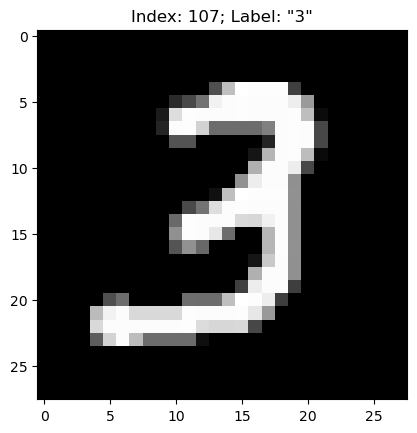

In [8]:
renderDigit(107)

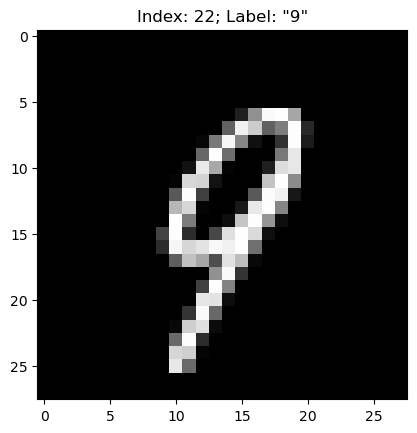

In [9]:
renderDigit(22)

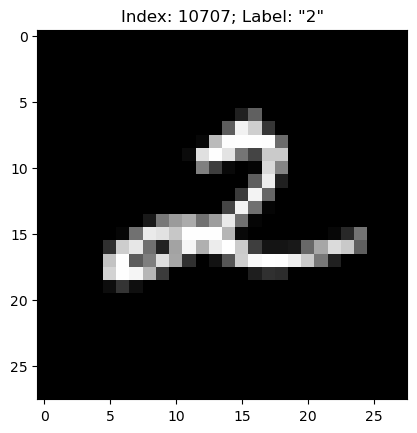

In [10]:
renderDigit(10707)

There are also some **really challenging** digits:

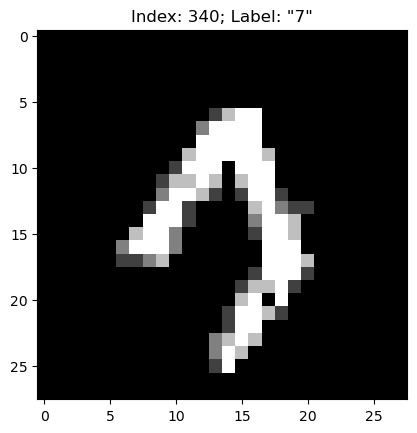

In [11]:
renderDigit(340)  # Is this a "3" or a "7"?

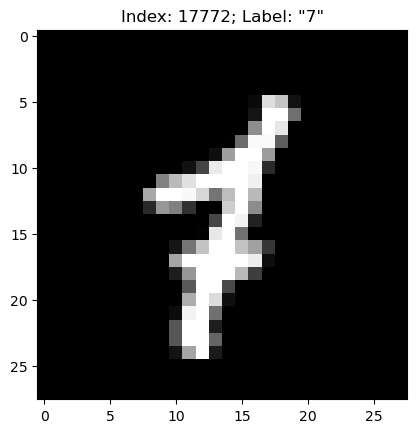

In [12]:
renderDigit(17772)  # Is this a "1" or a "7"?

<hr style="color: #DD3403;">

## Part 2: Splitting the Data into the Training and Test Datasets

When working with any AI algorithm, it's critical to reserve a portion of the data for **testing the model** that we're going to train. In this way we both avoid "over-fitting" our algorithm to specific data and have a reliable way to test if our model works with data that has never been seen before.

In the MNIST dataset, the first 60,000 rows of data are used for the **training dataset** and the final 10,000 rows are used for the **testing dataset**.  In the following cell, create two DataFrames (named `train` and `test`) that contain the training and testing portion of the entire MNIST dataset:

In [30]:
# Select the training data:
train = df.iloc[:60000]
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Select the testing data:
test = df.iloc[60000:,:]
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
60000,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60001,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60002,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60004,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
### TEST CASE for Part 2: Testing/Training Split
tada = "\N{PARTY POPPER}"
assert("train" in vars()), "Make sure you have defined a Python variable named `train`."
assert("test" in vars()), "Make sure you have defined a Python variable named `test`."
assert(len(train) == 60000), "The `train` DataFrame must have exactly 60,000 rows."
assert(train.index.min() == 0), "The first index in the `train` DataFrame must be index [0]."
assert(train.index.max() == 59999), "The last index in the `train` DataFrame must be index [59999]."
assert(len(test) == 10000), "The `test` DataFrame must have exactly 10,000 rows."
assert(test.index.min() == 60000), "The first index in the `test` DataFrame must be index [60000]."
assert(test.index.max() == 69999), "The last index in the `test` DataFrame must be index [69999]."
train = train.copy()
test = test.copy()
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Part 3: Using K-Means Clustering

We know from this MicroProject that the MNIST training dataset contains 60,000 labeled images, each containing the numbers 0 through 9 (ten total possible digits).

### Part 3.1: Initialize the K-Means Clustering Model

One of the simplest machine learning algorithms is k-means clustering.  First, create a `KMeans` clustering model stored in the Python variable `model` with a total of 10 different clusters (one cluster for each of the ten possible digits).

- Not sure how to do this? [Review creating a KMeans model on the DISCOVERY website.](https://discovery.cs.illinois.edu/learn/Towards-Machine-Learning/Clustering/)

In [31]:
from sklearn.cluster import KMeans

model = KMeans( n_clusters=10, ) # recordarr que los n_clústers, son los 10 diferentes números que queremos el modelo aprenda a diferenciar
model

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",10
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [32]:
train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [33]:
test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

### Part 3.2: Training your `KMeans` model with Training Data

Using the 784 columns you identified as the `PIXEL_COLUMNS` earlier in this MicroProject as your independent variable, train your `KMeans` model on your entire `train` DataFrame:

In [34]:
# Train your model:
model.fit(train[PIXEL_COLUMNS])


,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",10
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [35]:
model.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10, 784))

In [36]:
model.labels_

array([0, 6, 4, ..., 0, 7, 3], shape=(60000,), dtype=int32)

### Part 3.3: Labeling Training Data with Clusters

Since k-means is an **unsupervised** algorithm, we have found ten distinct clusters but we don't know what's in each cluster.  To find the best label for each cluster, we have to find the label that is most frequent in each cluster.

To do this, we first need to **identify the cluster that each of training data rows exist in**.  To do this, add a new column to your DataFrame called `cluster` that contains the cluster that each row of your `train` DataFrame is in.  *(Hint: You can do this by assigning the result of `model.predict( train[PIXEL_COLUMNS] )` to the new column.)*


In [37]:
train["cluster"] = model.labels_ #model.predict(train)
train

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_2524\3312987596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["cluster"] = model.labels_ #model.predict(train)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,cluster
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [38]:
### TEST CASE for Part 3.3: Training and Labeling your KMeans model with Training Data
tada = "\N{PARTY POPPER}"
assert("model" in vars()), "Make sure you have defined a Python variable called `model`."
assert( model.n_clusters == 10 ), "Your model must have 10 clusters (one for each digit), this a parameter you must include in the model initialization."
assert( model.cluster_centers_.mean() > 0 ), "You must fit your model with training data."
assert("cluster" in train), "Your `train` DataFrame must contain a column named `cluster`."
for i in range(10): assert( i in train["cluster"] ), f"Your `train` data must contain data labeled as cluster {i} in the `cluster` column.  (Your data never has cluster {i} appearing in the DataFrame.)"
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


### Part 3.4: Identifying Each Cluster's Label

Now we can consider any example cluster, and we'll start with `4`.  Create a DataFrame named `train_cluster4` that contains all of the training data that is labeled to be in cluster `4`:

In [40]:
train_cluster4 = train[train["cluster"] == 4 ].reset_index(drop=True)
train_cluster4

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,cluster
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8924,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8925,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8926,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8927,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


The following code randomly chooses eight of the rows in `train_cluster4` and renders them, resulting in eight sample images from within that cluster.  If KMeans is a good clustering algorithm, all of the images **should be the same digit almost every time** since they're all in the same cluster.  Run the code below to see how the clustering did:

*(You can run this code multiple times to view different samples.)*

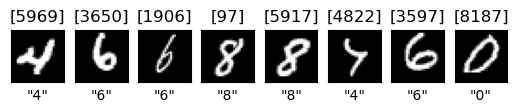

In [43]:
renderDigit( train_cluster4.sample(n=8).index.tolist() )

Even though it's not perfect, the majority of rows in a particular cluster should have the same label (the true numerical digit for that row) -- the most popular label in each cluster can be chosen as the label for the entire cluster.  For example, here's the distribution of the labels within `train_cluster4`:

In [44]:
train_cluster4["label"].value_counts()

label
4    3189
9    2901
7    1795
5     374
8     193
3     177
2     174
6      82
0      38
1       6
Name: count, dtype: int64

The most common label for all the training images in `train_cluster4` value appears first and is known as the "mode" of the label category. It will be the "label" of the entire cluster.  We can generalize this approach to find the mode for every cluster by grouping by the "cluster" and finding the mode of the "label" column:

In [45]:
cluster_label = train[["cluster", "label"]].groupby("cluster").agg(pd.Series.mode)
cluster_label

,label
cluster,
0,8
1,1
2,7
3,1
4,4
5,0
6,0
7,6
8,3


Finally, we can use this set of cluster labels to label each cluster with the predicted label.

The final code we provide is a function that uses the `cluster` value in each row and finds the corresponding `label` from the `cluster_label` DataFrame that we just found:

In [46]:
def labelCluster(row):
  # Find the data stored in the column "cluster":
  cluster = row["cluster"]

  # Use the cluster to find the row in the cluster_label that contains that "cluster":
  label = cluster_label.loc[cluster]["label"]

  # Return the label we found:
  return label

Use `train.apply(labelCluster, axis=1)` to run the `labelCluster` function for each row in the DataFrame.  Add the result of this function to the `train` DataFrame as a new column called `predicted`:

In [47]:
train["predicted"] = train.apply(labelCluster, axis=1)
train[ ["label", "predicted"] ]   # Show only the label and predicted columns

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_2524\1034697459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["predicted"] = train.apply(labelCluster, axis=1)


,label,predicted
0,5,8
1,0,0
2,4,4
3,1,1
4,9,7
...,...,...
59995,8,8
59996,3,8
59997,5,8
59998,6,6


In [48]:
### TEST CASE for Part 3.4: Identifying Each Cluster's Label
tada = "\N{PARTY POPPER}"
assert("train_cluster4" in vars()), "Make sure you have defined a Python variable called `train_cluster4`."
assert( len(train_cluster4.cluster.unique()) == 1 ), "The data in `train_cluster4` must only be from cluster 4."
assert( train_cluster4.cluster.max() == 4 ), "The data in `train_cluster4` must only be from cluster 4."
assert("cluster_label" in vars()), "Make sure you have defined a Python variable called `cluster_label`."
assert("labelCluster" in vars()), "Make sure you have defined a Python function called `labelCluster`."
assert("predicted" in train), "Your `train` DataFrame must contain a column named `predicted`."
for i in range(10):
  assert( len(train[train.cluster == i]["predicted"].unique()) == 1 ), f"The predicted label value for all data in cluster {i} must be the same (all the rows are in the same cluster)."
  assert( train[train.cluster == i]["predicted"].max() == cluster_label.loc[i]["label"] ), f"The predicted label value for all data in cluster {i} must be {cluster_label.loc[i]['label']}."
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


### Part 3.5: Label the Testing Data with a Prediction

In the previous code, we labeled the **training data** with the predicted label.  However, the **testing data** is data that our model has never seen before and should be used to find the accuracy of our model.

First, using `model`, add a new column `"cluster"` to the `test` DataFrame.  *(This will be very similar to adding it to the `train` DataFrame, but now we're using a different DataFrame but the same trained model.)*


In [50]:
# Label each row in the `test` DataFrame with its "cluster":
test["cluster"] = model.predict(test[PIXEL_COLUMNS])
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,cluster
60000,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
60001,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
60002,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
60003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
60004,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
69996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
69997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


Next, apply the `labelCluster` function to every row in your `test` DataFrame and add a new column called `predicted` to your `test` DataFrame:

In [53]:
# Label each row in the `test` DataFrame with its "predicted" label:
test["predicted"] = test.apply(labelCluster, axis=1)


test[["label", "predicted"]]    # Show only the label and predicted columns

,label,predicted
60000,7,7
60001,2,3
60002,1,1
60003,0,0
60004,4,4
...,...,...
69995,2,2
69996,3,3
69997,4,7
69998,5,7


In [54]:
### TEST CASE for Part 3.5: Label the Testing Data with a Prediction
tada = "\N{PARTY POPPER}"
assert("cluster" in test), "Your `test` DataFrame must contain a column named `cluster`."
assert("predicted" in test), "Your `test` DataFrame must contain a column named `predicted`."
for i in range(10):
  assert( len(test[test.cluster == i]["predicted"].unique()) == 1 ), f"The predicted label value for all data in cluster {i} must be the same (all the rows are in the same cluster)."
  assert( test[test.cluster == i]["predicted"].max() == cluster_label.loc[i]["label"] ), f"The predicted label value for all data in cluster {i} must be {cluster_label.loc[i]['label']}."
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


### Part 3.6: Calculate the Prediction Error

The correct prediction for each row in our DataFrame is when the **`label` matches the `predicted` label**.  A reliable algorithm should have a very low error rate, and any error rate above 5% will be quickly noticed by humans.

Find the number of rows where the `label` does not match the `predicted` label in the `test` DataFrame:

In [55]:
incorrect_predictions = test[test["label"] == test["predicted"]]
incorrect_predictions

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,cluster,predicted
60000,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,7
60002,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
60003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
60004,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4
60005,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
69994,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
69995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,2
69996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,3


Convert the number of errors into a percentage (decimal form) of the 10,000 test images:

In [56]:
kmeans_error_pct = incorrect_predictions.shape[0] / test.shape[0]
kmeans_error_pct

0.5946

In [57]:
### TEST CASE for Part 3.6: Calculate the Prediction Error
tada = "\N{PARTY POPPER}"
assert("incorrect_predictions" in vars()), "Make sure you have defined a Python variable called `incorrect_predictions`."
assert("kmeans_error_pct" in vars()), "Make sure you have defined a Python variable called `kmeans_error_pct`."
assert( kmeans_error_pct > 0.3 and kmeans_error_pct < 0.6 ), "Make sure you correctly calculated the prediction error as a percentage between 0 and 1."
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


<hr style="color: #DD3403;">

## Part 4: Using k-Nearest Neighbors (kNN) Classifier

In Part 3, you found that clustering the features using KMeans failed to accurately predict data.  Many times in AI and machine learning, the first approach you try doesn't yield great results.  Finding the right algorithm for a specific dataset is very hard and knowing hundreds of different algorithms and when to apply them makes you a great data scientist.

Let's try another simple classification algorithm -- but this time, let's see if a supervised algorithm can give us a better result!


### Part 4.1: Finding Neighbors

The k-Nearest Neighbor algorithm is simple: find the `k` closest points from your training data and use the most commonly occurring label.  That's it!

Let's start by taking the very first row in our `test` dataset and call it our `sample`:

*(Hint: what is the index of the first row in the `test` dataset? How do you get a row given its index?)*

In [60]:
test.reset_index(drop=True)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,cluster,predicted
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,7
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,3
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,2
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,3
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,7
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,7


In [64]:
# Select the first row from the `test` DataFrame:
sample = test.iloc[0]
sample

label        7
pixel1       0
pixel2       0
pixel3       0
pixel4       0
            ..
pixel782     0
pixel783     0
pixel784     0
cluster      2
predicted    7
Name: 60000, Length: 787, dtype: int64

Once we have our `sample`, we can find the difference between the values in each `pixel` column by subtracting the entire training DataFrame from the sample to get a DataFrame of the differences:

In [65]:
# Find the squared difference between the each of the pixel column values
# between each row in our `train` DataFrame and the sample:
distance = (train[PIXEL_COLUMNS] - sample[PIXEL_COLUMNS]) ** 2

# Take the square root of the sum of all the values:
train["distance"] = distance.sum(axis=1) ** 0.5
 
# ...and display a center-area pixel to make sure it's working:
train[ ["label", "distance"] ]

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_2524\326009182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["distance"] = distance.sum(axis=1) ** 0.5


,label,distance
0,5,2395.795692
1,0,2650.630302
2,4,2407.308248
3,1,2556.609669
4,9,2345.209159
...,...,...
59995,8,2522.400048
59996,3,2596.233233
59997,5,2414.201731
59998,6,2431.140884


Using the `distance` column that was just calculated, find the 5 rows in your `train` dataset that have the **smallest distance** and store those five rows in the DataFrame `neighbors`:

In [69]:
neighbors = train.sort_values(by="distance", ascending=True)[:5]
neighbors[ ["label", "distance"] ]

,label,distance
53843,7,676.584067
38620,7,793.986776
16186,7,862.676649
27059,7,864.503904
47003,7,894.699950


In the above DataFrame, you should find that **all of the neighbors** of the first sample are labeled with `7`.  This means we predict that the label of our sample is `7`.  *Is that what it was label when we found our sample at the beginning of Part 4.1?*

In [70]:
### TEST CASE for Part 4.1: Finding Neighbors
tada = "\N{PARTY POPPER}"
assert("neighbors" in vars()), "Make sure you have defined a Python variable called `neighbors`."
assert(len(neighbors) == 5), "Your `neighbors` DataFrame must have exactly 5 rows."
assert(sum(neighbors.index) == 182711), "The rows in your `neighbors` DataFrame are the incorrect neighbors.  (Is your sample correct?)"
print(f"{tada} All Tests Passed! {tada}")


🎉 All Tests Passed! 🎉


### Part 4.2: Training the `KNeighborsClassifier`

Similar to `LinearRegression`, the `KNeighborsClassifier` in the sklearn library is a supervised machine learning algorithm.  Unlike linear regression, `KNeighborsClassifier` will predict a label (category) instead of a number (regression).

First, initialize an instance of the `KNeighborsClassifier` using all the default parameters (you don't need to specify anything in the initialization) as `model2`:

In [72]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()

Second, identify the independent and dependent variables:

In [79]:
# Identify the independent variables used in our prediction:
ind = PIXEL_COLUMNS
ind

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [80]:
# Identify the dependent variable in our `train` DataFrame (what column contains the label)?
dep = "label"
dep

'label'

Finally, fit the `train` data to our `KNeighborsClassifier` that we called `model2`:

In [81]:
model2.fit(train[ind], train[dep])
model2

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


### Part 4.3: Understanding the `KNeighborsClassifier` Neighbors

First, let's refresh what neighbors we found for the first row in our test DataFrame:

In [82]:
# Display the "distance" column for the `neighbors` DataFrame:
neighbors[ ["distance"] ]

,distance
53843,676.584067
38620,793.986776
16186,862.676649
27059,864.503904
47003,894.699950


Before we make a prediction, let's check if the neighbors we found ourselves matches the ones found by the `KNeighborsClassifier` algorithm below:

In [83]:
model2.kneighbors( test[:1][PIXEL_COLUMNS] )

(array([[676.58406721, 793.98677571, 862.67664858, 864.50390398,
         894.6999497 ]]),
 array([[53843, 38620, 16186, 27059, 47003]]))

If everything is correct so far, the distances (first list) and the indexes (second list) in the cell above should exactly match the DataFrame you created earlier. 🎉

### Part 4.4: Labeling Predictions Using the `KNeighborsClassifier`

Let's first make a prediction using our sample, and see if our prediction matches:

In [84]:
model2.predict( test[:1][PIXEL_COLUMNS] )

array([7])

Now, add a new `predicted` column to the entire `test` dataset by predicting the value of the **full** test dataset by using your `model2` classifier:

**(NOTE: This may take up to minute on a slower laptop, there's A LOT of distances to find!)**

In [85]:
test["predicted"] = model2.predict( test[PIXEL_COLUMNS] )
test[ ["label", "predicted"] ]

,label,predicted
60000,7,7
60001,2,2
60002,1,1
60003,0,0
60004,4,4
...,...,...
69995,2,2
69996,3,3
69997,4,4
69998,5,5


In [86]:
### TEST CASE for Part 4.4: Labeling Predictions Using the KNeighborsClassifier
tada = "\N{PARTY POPPER}"
assert("model2" in vars()), "Make sure you have defined a Python variable called `model2`."
assert(model2.n_features_in_ == 784), "Your `model2` must have 784 independent variables (each pixel value)."
assert(("predict" in test and sum(test.label != test.predict) == 312) or sum(test.label != test.predicted) == 312), "Your `test` predictions are not a prediction from a kNN model."
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


### Part 4.5: Calculate Prediction Error

Just like with KMeans clustering, the correct prediction for each row in our DataFrame is when the **`label` matches the `predicted` label**.  A reliable algorithm should have a very low error rate, and any error rate above 5% will be quickly noticed by humans.

Now that we labeled our `test` DataFrame using kNN, find the number or rows where the `label` does not match the `predicted` label in the `test` DataFrame:

In [90]:
incorrect_predictions = test [ test["label"] != test["predicted"] ]
incorrect_predictions

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,cluster,predicted
60033,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0
60115,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,9
60195,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
60241,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
60247,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69839,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,7
69879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,6
69904,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
69905,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,9


Just like before, convert this to a percentage (in decimal form):

In [91]:
knn_error_pct = incorrect_predictions.shape[0] / test.shape[0]
knn_error_pct

0.0312

In [92]:
### TEST CASE for Part 4.5: Calculate Prediction Error
import math
tada = "\N{PARTY POPPER}"
assert("knn_error_pct" in vars()), "Make sure you have defined a Python variable called `knn_error_pct`."
assert(
  math.isclose(knn_error_pct, sum(test.label != test.predicted) * 1e-4) or 
  ("predict" in test and math.isclose(knn_error_pct, sum(test.label != test.predict) * 1e-4))
), "Your `knn_error_pct` value is incorrect."
print(f"{tada} All Tests Passed! {tada}")

🎉 All Tests Passed! 🎉


### Part 4.6: Comparing Error

Running the following cell will provide a summary of the two error rates you calculated on the MNIST dataset:

In [93]:
pd.DataFrame([
  {"Model": "K-Means Clustering", "MNIST Test Suite Prediction Error": kmeans_error_pct},
  {"Model": "K-Nearest Neighbors", "MNIST Test Suite Prediction Error": knn_error_pct},
])

,Model,MNIST Test Suite Prediction Error
0,K-Means Clustering,0.5946
1,K-Nearest Neighbors,0.0312


Exploring how different models perform with different datasets, and understanding why a model works and doesn't work, is one of the most foundational things in Data Science:
- Which model performed better on the MNIST test data?
- Was there a significant difference in the error rates?

You can now use your trained model to predict writing you have never seen -- and recognize any handwritten digit! 🎉

<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and return to https://discovery.cs.illinois.edu/microproject/learning-handwritten-digits-with-ai/ and complete the section **"Commit and Grade Your Notebook"**.

3. If you see a 100% grade result on your GitHub Action, you've completed this MicroProject! 🎉